## Lets Start Microsoft Movie Analysis 

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

In [5]:
len(basics)

146144

In [6]:
rating = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

In [71]:
len(rating)

73856

In [7]:
# merge two DFs to have 'averagerating' and numvotes columns
df = pd.merge(left=basics, right=rating, left_on='tconst', right_on='tconst')

In [8]:
df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [9]:
df['original_title'].duplicated().sum()

2759

In [10]:
df['original_title'].drop_duplicates(inplace=True)

In [11]:
len(df)

73856

In [12]:
df['runtime_minutes'].isna().sum()

7620

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
tconst             73856 non-null object
primary_title      73856 non-null object
original_title     73856 non-null object
start_year         73856 non-null int64
runtime_minutes    66236 non-null float64
genres             73052 non-null object
averagerating      73856 non-null float64
numvotes           73856 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [14]:
df.sort_values(by= ['numvotes', 'averagerating'], ascending=False).head(15)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2387,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2241,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
280,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
12072,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405
325,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
507,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",8.2,1035358
1091,tt1130884,Shutter Island,Shutter Island,2010,138.0,"Mystery,Thriller",8.1,1005960
15327,tt2015381,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy",8.1,948394
2831,tt1431045,Deadpool,Deadpool,2016,108.0,"Action,Adventure,Comedy",8.0,820847
2523,tt1392170,The Hunger Games,The Hunger Games,2012,142.0,"Action,Adventure,Sci-Fi",7.2,795227


In [15]:
df.isna().sum()

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [16]:
df.drop(['primary_title'], axis=1, inplace=True)

In [17]:
YR = df.loc[:,['start_year', 'averagerating']]

In [18]:
YR.groupby(['start_year']).mean()

,averagerating
start_year,
2010,6.259585
2011,6.290134
2012,6.297057
2013,6.287259
2014,6.319806
2015,6.265894
2016,6.347300
2017,6.397624
2018,6.415599


In [19]:
YV = df.loc[:,['start_year', 'numvotes']]

In [20]:
YV.groupby(['start_year']).sum()

,numvotes
start_year,
2010,30485759
2011,32741501
2012,32726315
2013,35638577
2014,34382294
2015,26167370
2016,26621703
2017,21901644
2018,16507889


In [21]:
GV = df.loc[:,['genres','averagerating','numvotes']]

In [22]:
GV.groupby(['genres']).mean().sort_values(by=['numvotes'], ascending=False)

,averagerating,numvotes
genres,,
"Action,Adventure,Sci-Fi",5.655906,181285.417323
"Adventure,Mystery,Sci-Fi",5.075000,135042.500000
"Action,Fantasy,War",6.400000,131509.000000
"Adventure,Drama,Sci-Fi",6.170000,99316.950000
"Action,Adventure,Fantasy",5.371845,93775.563107
...,...,...
"Action,Documentary,Horror",6.400000,5.000000
"Crime,Western",6.400000,5.000000
"Comedy,Documentary,Fantasy",9.400000,5.000000


In [31]:
GV.groupby(['genres']).median().sort_values(by=['numvotes'], ascending=False)

,averagerating,numvotes
genres,,
"Action,Fantasy,War",6.40,131509.0
"Action,Crime,Sci-Fi",6.10,43304.0
"Documentary,Sport,Thriller",7.90,28979.0
"Action,Crime,Sport",5.80,26921.0
"Animation,Biography,Crime",7.55,20011.0
...,...,...
"Family,War",5.80,5.0
"History,Sport",9.20,5.0
"Comedy,Documentary,Fantasy",9.40,5.0


In [29]:
df.dropna(subset=['genres'], inplace=True)

In [33]:
len(GV.genres.unique())

924

In [30]:
df

,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,2019,86.0,Documentary,6.2,5
73851,tt9913084,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,2017,NaN,Documentary,8.5,8


In [37]:
df_genres = pd.DataFrame({'movie_id' : range(924), 'genres' : GV['genres'].unique()})

In [38]:
df_genres

,movie_id,genres
0,0,"Action,Crime,Drama"
1,1,"Biography,Drama"
2,2,Drama
3,3,"Comedy,Drama"
4,4,"Comedy,Drama,Fantasy"
...,...,...
919,919,"Adventure,History,Sci-Fi"
920,920,"Musical,Romance,Western"
921,921,"Comedy,Music,Thriller"
922,922,"Drama,Short"


In [44]:
gen_sep = df['genres'].str.get_dummies(sep=',')

In [47]:
gen_sep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 26 columns):
Action         73052 non-null int64
Adult          73052 non-null int64
Adventure      73052 non-null int64
Animation      73052 non-null int64
Biography      73052 non-null int64
Comedy         73052 non-null int64
Crime          73052 non-null int64
Documentary    73052 non-null int64
Drama          73052 non-null int64
Family         73052 non-null int64
Fantasy        73052 non-null int64
Game-Show      73052 non-null int64
History        73052 non-null int64
Horror         73052 non-null int64
Music          73052 non-null int64
Musical        73052 non-null int64
Mystery        73052 non-null int64
News           73052 non-null int64
Reality-TV     73052 non-null int64
Romance        73052 non-null int64
Sci-Fi         73052 non-null int64
Short          73052 non-null int64
Sport          73052 non-null int64
Thriller       73052 non-null int64
War            73052 non-nu

In [48]:
gen_sep.Action.sum()

6988

In [62]:
gen_sep

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73850,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
73851,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
73852,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
73853,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
genres_cum = gen_sep.sum().sort_values()

In [72]:
gen_sep.sum()

Action          6988
Adult              3
Adventure       3817
Animation       1743
Biography       3809
Comedy         17290
Crime           4611
Documentary    17753
Drama          30788
Family          3412
Fantasy         2126
Game-Show          2
History         2825
Horror          7674
Music           1968
Musical          721
Mystery         3039
News             579
Reality-TV        17
Romance         6589
Sci-Fi          2206
Short              1
Sport           1179
Thriller        8217
War              853
Western          280
dtype: int64

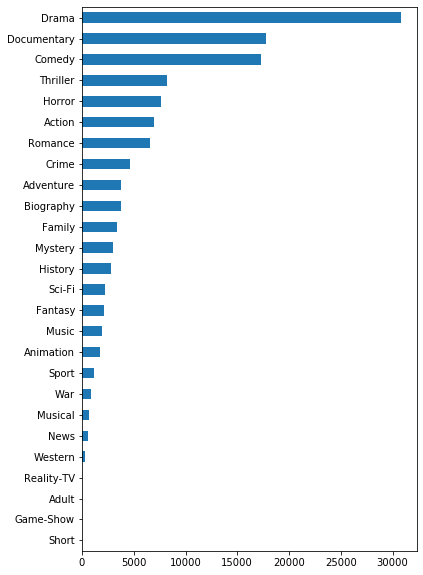

In [70]:
genres_cum.plot(kind='barh' , figsize=(6,10))